In [1]:
import csv
import pandas as pd
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community
from functools import reduce
import matplotlib.pyplot as plt
import os

# Read data

In [47]:
with open('www.forefdn.org - Nodes.csv', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes] # Get a list of only the node names

In [48]:
with open('www.forefdn.org - Edges (Internal).csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edges = [tuple(e) for e in edgereader][1:] # Retrieve the data
    edges = [x for x in edges if x[0] != x[1]]

# Build Network

In [49]:
G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)

In [50]:
G.remove_nodes_from(list(nx.isolates(G)))

for component in list(nx.connected_components(G)):
    if len(component)<3:
        for node in component:
            G.remove_node(node)

In [51]:
degree_dict = dict(G.degree(G.nodes()))

nx.set_node_attributes(G, degree_dict, 'degree')

# Network-wide Metrics

In [52]:
n_nodes = G.number_of_nodes()
print("Number of Nodes:", n_nodes)

Number of Nodes: 526


In [53]:
n_edges = G.number_of_edges()
print("Number of Nodes:", n_edges)

Number of Nodes: 5008


In [54]:
density = nx.density(G)
print("Network Density:", density)

Network Density: 0.036270143038203875


In [55]:
diameter = nx.diameter(G)
print("Diameter:", diameter)

Diameter: 5


In [56]:
transitivity = nx.transitivity(G)
print("Transitivity:", transitivity)

Transitivity: 0.28375687008112066


In [57]:
avg_clustering = nx.average_clustering(G)
print("Average Clustering:", avg_clustering)

Average Clustering: 0.40577903189451214


# Node-specific metrics

In [13]:
betweenness = nx.betweenness_centrality(G, normalized=False)
print(sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[0:10])

[('https://forefdn.org/our-grantees/', 45592.56064115523), ('https://forefdn.org/resources/', 7619.721953919097), ('https://forefdn.org/about-us/', 7409.187210295589), ('https://forefdn.org/news-updates/', 4990.214041099446), ('https://forefdn.org/tapping-into-virtual-recovery-supports/', 4867.070919556882), ('https://forefdn.org/grants-and-funding/', 4696.351538410269), ('https://forefdn.org/grantee-spotlight-encouraging-physicians-to-treat-opioid-use-disorder-in-emergency-departments-across-the-u-s/', 4336.756785472027), ('https://forefdn.org/presidents-update-dec-20-fores-year-of-firsts-in-the-midst-of-a-pandemic/', 4118.20602436229), ('https://forefdn.org/grantee-spotlight-improving-access-to-recovery-supports-in-colleges-and-universities/', 3673.264814369695), ('https://forefdn.org/our-grantees/page/4/', 2897.1892057256696)]


In [14]:
eigenvector = nx.eigenvector_centrality(G)
print(sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)[0:10])

[('https://forefdn.org/our-grantees/', 0.1736129881455603), ('https://forefdn.org/resources/', 0.16330010898328462), ('https://forefdn.org/news-updates/', 0.16320652670136257), ('https://forefdn.org/about-us/', 0.16197041395824832), ('https://forefdn.org/grants-and-funding/', 0.16180245675435415), ('https://forefdn.org/', 0.16157382999812975), ('https://forefdn.org/careers/', 0.16157382999812975), ('https://forefdn.org/financial-reports/', 0.16157382999812975), ('https://forefdn.org/contact-us/', 0.16153972994974358), ('https://forefdn.org/privacy-policy/', 0.16153972994974358)]


In [15]:
closeness = nx.closeness_centrality(G)
print(sorted(closeness.items(), key=lambda x: x[1], reverse=True)[0:10])

[('https://forefdn.org/our-grantees/', 0.6713554987212276), ('https://forefdn.org/resources/', 0.5898876404494382), ('https://forefdn.org/about-us/', 0.587248322147651), ('https://forefdn.org/news-updates/', 0.5859375), ('https://forefdn.org/grants-and-funding/', 0.5839822024471635), ('https://forefdn.org/', 0.5807522123893806), ('https://forefdn.org/careers/', 0.5807522123893806), ('https://forefdn.org/financial-reports/', 0.5807522123893806), ('https://forefdn.org/contact-us/', 0.580110497237569), ('https://forefdn.org/privacy-policy/', 0.580110497237569)]


In [16]:
eccentricity = nx.eccentricity(G)
print(sorted(eccentricity.items(), key=lambda x: x[1], reverse=True)[0:10])

[('https://forefdn.org/resources//?res=covid-19', 5), ('https://forefdn.org/wp-content/uploads/2021/07/peerqualstudy_featured.png', 5), ('https://forefdn.org/wp-content/uploads/2021/06/peerwebinar_featured.jpg', 5), ('https://forefdn.org/resources//?res=mother-child-dyad', 5), ('https://forefdn.org/news-updates//?res=fore-announcements', 5), ('https://forefdn.org/resources//?res=program-advisory-meeting', 5), ('https://forefdn.org/resources//?res=issue-brief', 5), ('https://forefdn.org/news-updates//?res=webinar', 5), ('https://forefdn.org/resources//?res=policy-brief', 5), ('https://forefdn.org/news-updates//?res=presidents-update', 5)]


In [17]:
pr = nx.pagerank(G, alpha=0.85)
print(sorted(pr.items(), key=lambda x: x[1], reverse=True)[0:10])

[('https://forefdn.org/our-grantees/', 0.02736244551317377), ('https://forefdn.org/our-grantees/page/4/', 0.018416880596053425), ('https://forefdn.org/our-grantees/page/5/', 0.018416880596053425), ('https://forefdn.org/our-grantees/page/2/', 0.018416880596053425), ('https://forefdn.org/our-grantees/page/3/', 0.018416880596053425), ('https://forefdn.org/about-us/', 0.014166306111748751), ('https://forefdn.org/resources/', 0.013421723888897629), ('https://forefdn.org/grants-and-funding/', 0.012866669821186979), ('https://forefdn.org/news-updates/', 0.012710012968271019), ('https://forefdn.org/', 0.011710817775679278)]


In [18]:
nx.set_node_attributes(G, betweenness, 'betweenness')
nx.set_node_attributes(G, eigenvector, 'eigenvector')
nx.set_node_attributes(G, closeness, 'closeness')
nx.set_node_attributes(G, eccentricity, 'eccentricity')
nx.set_node_attributes(G, pr, 'pagerank')

In [19]:
betweenness_df = pd.DataFrame.from_dict(data = betweenness.items())
betweenness_df.columns = ['Node', 'Betweenness']

eigenvector_df = pd.DataFrame.from_dict(data = eigenvector.items())
eigenvector_df.columns = ['Node', 'Eigenvector']

closeness_df = pd.DataFrame.from_dict(data = closeness.items())
closeness_df.columns = ['Node', 'Closeness']

eccentricity_df = pd.DataFrame.from_dict(data = eccentricity.items())
eccentricity_df.columns = ['Node', 'Eccentricity']

pr_df = pd.DataFrame.from_dict(data = pr.items())
pr_df.columns = ['Node', 'PageRank']

In [20]:
node_metrics_df = reduce(lambda left,right: pd.merge(left,right,on='Node'), [betweenness_df, eigenvector_df, closeness_df, eccentricity_df, pr_df])

In [23]:
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()
density = nx.density(G)
diameter = nx.diameter(G)
transitivity = nx.transitivity(G)
avg_clustering = nx.average_clustering(G)


# Function

In [13]:
def topology(name, node, edge, isolated_n=3):
    
    #Read Data 
    
    with open(node, 'r') as nodecsv: # Open the file
        nodereader = csv.reader(nodecsv) # Read the csv
        # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
        nodes = [n for n in nodereader][1:]

    node_names = [n[0] for n in nodes] # Get a list of only the node names
    
    with open(edge, 'r') as edgecsv: # Open the file
        edgereader = csv.reader(edgecsv) # Read the csv
        edges = [tuple(e[1:3]) for e in edgereader][1:] # Retrieve the data
        edges = [x for x in edges if x[0] != x[1]] # Remove circular edges; link to itself
        
    #Build Network
    
    G = nx.Graph()
    G.add_nodes_from(node_names)
    G.add_edges_from(edges)

    #Remove isolated components
    
    G.remove_nodes_from(list(nx.isolates(G)))

    for component in list(nx.connected_components(G)):
        if len(component)<isolated_n:
            for node in component:
                G.remove_node(node)
                
    degree_dict = dict(G.degree(G.nodes()))
    nx.set_node_attributes(G, degree_dict, 'degree')
    
    #Network-wide metrics
    n_nodes = G.number_of_nodes()
    n_edges = G.number_of_edges()
    density = nx.density(G)
    diameter = nx.diameter(G)
    transitivity = nx.transitivity(G)
    avg_clustering = nx.average_clustering(G)
    
    network_df = pd.DataFrame(columns = ['Name', 'Nodes', 'Edges', 'Density', 'Diameter', 'Transitivity', 'Average Clustering'])       
    network_df.loc[len(network_df), :] = [name, n_nodes, n_edges, density, diameter, transitivity, avg_clustering]
    
    if os.path.isfile("summary_network_metrics.tsv") is True:
        network_df.to_csv("summary_network_metrics.tsv", sep="\t", header=False, index=False, mode="a")
    else:
        network_df.to_csv("summary_network_metrics.tsv", sep="\t", index=False, mode="w")
        
    #Node-specific metrics
    betweenness = nx.betweenness_centrality(G, normalized=False)
    eigenvector = nx.eigenvector_centrality(G)
    closeness = nx.closeness_centrality(G)
    eccentricity = nx.eccentricity(G)
    pr = nx.pagerank(G, alpha=0.85)
    
    nx.set_node_attributes(G, betweenness, 'betweenness')
    nx.set_node_attributes(G, eigenvector, 'eigenvector')
    nx.set_node_attributes(G, closeness, 'closeness')
    nx.set_node_attributes(G, eccentricity, 'eccentricity')
    nx.set_node_attributes(G, pr, 'pagerank')
    
    betweenness_df = pd.DataFrame.from_dict(data = betweenness.items())
    betweenness_df.columns = ['Node', 'Betweenness']

    eigenvector_df = pd.DataFrame.from_dict(data = eigenvector.items())
    eigenvector_df.columns = ['Node', 'Eigenvector']

    closeness_df = pd.DataFrame.from_dict(data = closeness.items())
    closeness_df.columns = ['Node', 'Closeness']

    eccentricity_df = pd.DataFrame.from_dict(data = eccentricity.items())
    eccentricity_df.columns = ['Node', 'Eccentricity']

    pr_df = pd.DataFrame.from_dict(data = pr.items())
    pr_df.columns = ['Node', 'PageRank']
    
    node_metrics_df = reduce(lambda left,right: pd.merge(left,right,on='Node'), [betweenness_df, eigenvector_df, closeness_df, eccentricity_df, pr_df])
    
    node_metrics_df.to_csv(name + "_node_metrics.tsv", sep="\t", index=False)
    
    #Network Visualization
    
    plt.figure(1, figsize=(20,20)) 
    nx.draw(G, 
            pos = nx.spring_layout(G,scale=5, iterations=100),
            node_size = [x*10 for x in list(dict(G.degree).values())],
            edgecolors = "black")
    plt.savefig(name + '_network.png', dpi=300)
    plt.close()

In [76]:
topology(name = "forefdn", 
         node = 'www.forefdn.org - Nodes.csv', 
         edge = 'www.forefdn.org - Edges (Internal).csv', 
         isolated_n=3)

In [14]:
topology(name = "Ruby_Memorial_Hospital", 
         node = 'Ruby Memorial Hospital - Nodes.csv', 
         edge = 'Ruby Memorial Hospital - Internal Edges.csv', 
         isolated_n=3)

In [15]:
topology(name = "UCF_Lake_Nona_Medical_Center", 
         node = 'UCF Lake Nona Medical Center - Nodes.csv', 
         edge = 'UCF Lake Nona Medical Center - Internal Edges.csv', 
         isolated_n=3)

In [16]:
topology(name = "VUMC", 
         node = 'VUMC - Nodes.csv', 
         edge = 'VUMC - Internal Edges.csv', 
         isolated_n=3)

In [17]:
topology(name = "Western_Health", 
         node = 'Western Health - Nodes.csv', 
         edge = 'Western Health - Internal Edges.csv', 
         isolated_n=3)

In [18]:
topology(name = "Yale_New_Haven_Hospital", 
         node = 'Yale New Haven Hospital - Nodes.csv', 
         edge = 'Yale New Haven Hospital - Internal Edges.csv', 
         isolated_n=3)

In [21]:
test = pd.read_csv("/Users/davidchen/Downloads/Twist_Exome_Target_hg38.bed", sep="\t", header=None)

In [23]:
test.columns = ["Chromosome", "Start", "End"]

In [28]:
test['Chromosome'] = [x.split("chr")[1] for x in test['Chromosome']]

In [30]:
test.to_csv("/Users/davidchen/Documents/GitHub/J-statistic/package/example/input/example_exome.csv", index=False)

# Network Visualization

# Metrics Visualization

In [39]:
node_metrics_df

,Node,Betweenness,Eigenvector,Closeness,Eccentricity,PageRank
0,http://forefdn.org/,0.000000,0.002347,0.367647,4,0.000352
1,https://forefdn.org/,2431.228850,0.161574,0.580752,3,0.011711
2,https://forefdn.org/wp-content/plugins/wp-page...,1906.554776,0.134239,0.571895,3,0.010487
3,https://forefdn.org/wp-content/plugins/google-...,1906.554776,0.134239,0.571895,3,0.010487
4,https://forefdn.org/wp-content/themes/fore/dis...,1906.554776,0.134239,0.571895,3,0.010487
...,...,...,...,...,...,...
521,https://www.ama-assn.org/delivering-care/opioi...,0.000000,0.000874,0.303118,5,0.000362
522,https://americanhealth.jhu.edu/RuralOpioidsCount,0.000000,0.000860,0.305055,5,0.000369
523,https://oasas.ny.gov/covid19,0.000000,0.000880,0.306301,5,0.000399
524,https://www.youtube.com/watch?v=9toWqMoC_CE&fe...,0.000000,0.000874,0.303293,5,0.000368


In [59]:
range(1, max(node_metrics_df['Eccentricity'])

5

ValueError: weights should have the same shape as x

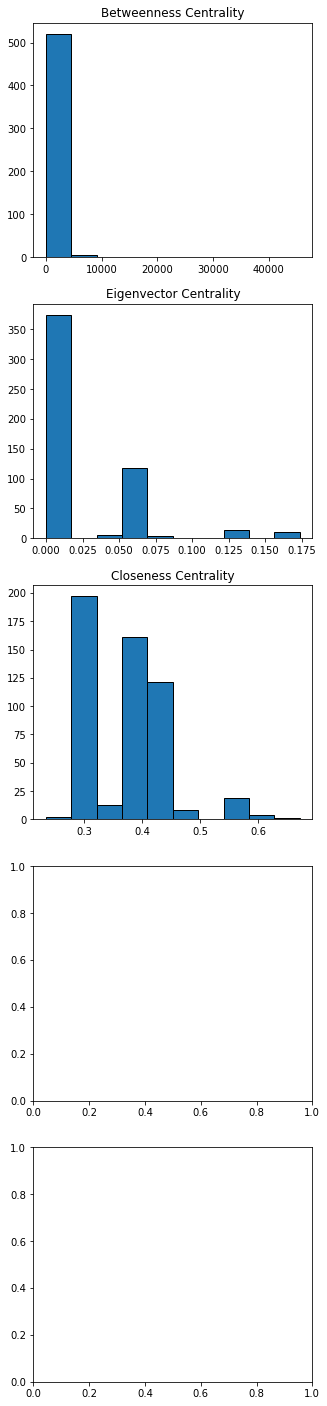

In [64]:
fig, ax = plt.subplots(5, 1, figsize=(5,25))
ax[0].hist(node_metrics_df['Betweenness'], bins=10, edgecolor="black")
ax[0].set_title("Betweenness Centrality")

ax[1].hist(node_metrics_df['Eigenvector'], bins=10, edgecolor="black")
ax[1].set_title("Eigenvector Centrality")

ax[2].hist(node_metrics_df['Closeness'], bins=10, edgecolor="black")
ax[2].set_title("Closeness Centrality")

ax[3].hist([0,1,2,3,4], bins=[0,1,2,3,4], weights=node_metrics_df['Eccentricity'], edgecolor="black")
ax[3].set_title("Eccentricity")
ax[3].set_xlim(0,)

ax[4].hist(node_metrics_df['PageRank'], bins=10, edgecolor="black")
ax[4].set_title("PageRank")

plt.xlim(0,)
plt.show()